Top features selected using Mutual Information Gain:
                        Feature  Mutual Information Gain
33               TCP_WIN_MAX_IN                 0.626021
1                   L4_DST_PORT                 0.596818
6                     OUT_BYTES                 0.588877
34              TCP_WIN_MAX_OUT                 0.551129
16             LONGEST_FLOW_PKT                 0.548645
19               MAX_IP_PKT_LEN                 0.548281
4                      IN_BYTES                 0.501210
26    SRC_TO_DST_AVG_THROUGHPUT                 0.495054
27    DST_TO_SRC_AVG_THROUGHPUT                 0.492568
9              CLIENT_TCP_FLAGS                 0.486138
10             SERVER_TCP_FLAGS                 0.466744
8                     TCP_FLAGS                 0.460221
14                      MIN_TTL                 0.412488
15                      MAX_TTL                 0.412082
18               MIN_IP_PKT_LEN                 0.409360
0                   L4_SRC_PORT    

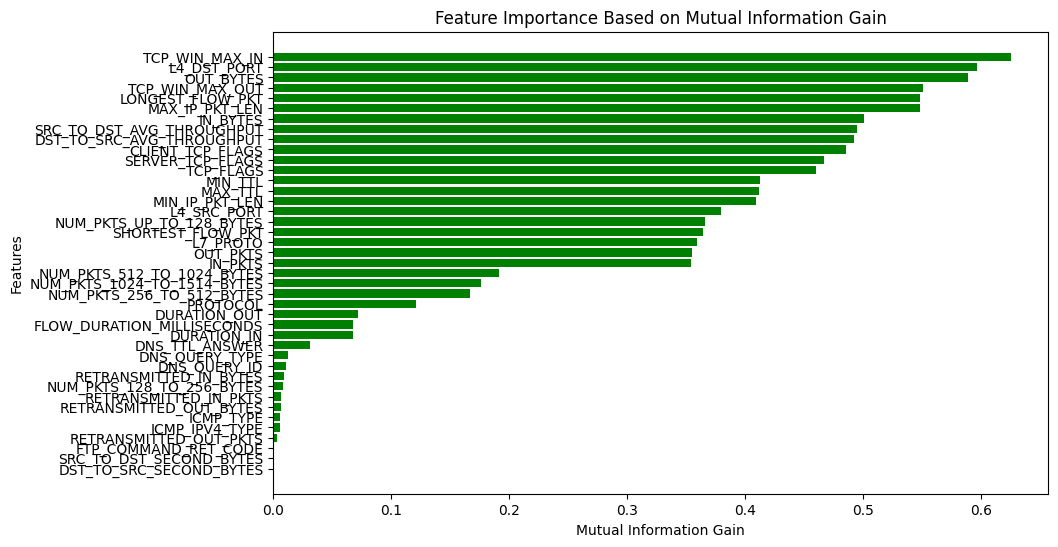

In [1]:

import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt 

# Load the dataset
df = pd.read_csv('/Users/hardeesh/CSV/Final_Data.csv') 

# Assuming 'Label' is the target variable
target_column = 'Label'

# Separate features (X) and the target variable (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Min-max scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Calculate mutual information gain for each feature
mutual_info = mutual_info_classif(X_scaled, y)

# Create a DataFrame to store feature importances with their corresponding column names
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information Gain': mutual_info})

# Sort the features based on their mutual information gain (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Mutual Information Gain', ascending=False)

# Print the top features with their mutual information gain scores
print("Top features selected using Mutual Information Gain:")
print(feature_importance_df)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Mutual Information Gain'], color='Green')
plt.xlabel('Mutual Information Gain')
plt.ylabel('Features')
plt.title('Feature Importance Based on Mutual Information Gain')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features on top
plt.show()

In [2]:
threshold = 0.1  # Adjust this threshold as needed

# Select features with mutual information gain above the threshold
top_features = X.columns[mutual_info > threshold]

# Print the selected features
print("Selected features with Mutual Information Gain above threshold:")
print(top_features)

Selected features with Mutual Information Gain above threshold:
Index(['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES',
       'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS', 'TCP_FLAGS', 'CLIENT_TCP_FLAGS',
       'SERVER_TCP_FLAGS', 'MIN_TTL', 'MAX_TTL', 'LONGEST_FLOW_PKT',
       'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN', 'MAX_IP_PKT_LEN',
       'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT',
       'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_256_TO_512_BYTES',
       'NUM_PKTS_512_TO_1024_BYTES', 'NUM_PKTS_1024_TO_1514_BYTES',
       'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT'],
      dtype='object')


In [3]:
# Filter the original DataFrame based on the top features
df_selected_features = df[top_features]
# Concatenate the selected features DataFrame with the target variable 'Label'
data= pd.concat([df_selected_features, df['Label']], axis=1)

data.head(0)

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,...,MAX_IP_PKT_LEN,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,NUM_PKTS_UP_TO_128_BYTES,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,Label


In [4]:
# Calculate Pearson correlation coefficient
correlation_matrix = data.corr()["Label"].sort_values(ascending=False)[1:]
# absolute for positive values
abs_corr = abs(correlation_matrix)
# random threshold for features to keep
relevant_features = abs_corr[abs_corr > 0.2]
relevant_features

CLIENT_TCP_FLAGS             0.717990
TCP_WIN_MAX_IN               0.683681
SERVER_TCP_FLAGS             0.665218
TCP_WIN_MAX_OUT              0.664057
MIN_TTL                      0.628748
MAX_TTL                      0.626599
TCP_FLAGS                    0.604354
MAX_IP_PKT_LEN               0.580464
LONGEST_FLOW_PKT             0.580464
MIN_IP_PKT_LEN               0.547314
DST_TO_SRC_AVG_THROUGHPUT    0.297628
L4_SRC_PORT                  0.212292
L4_DST_PORT                  0.445387
Name: Label, dtype: float64

In [5]:
# Filter the original DataFrame based on the top features
df_relevant_features = data[relevant_features.index]
# Concatenate the selected features DataFrame with the target variable 'Label'
data= pd.concat([df_relevant_features, df['Label']], axis=1)

data.head(0)

,CLIENT_TCP_FLAGS,TCP_WIN_MAX_IN,SERVER_TCP_FLAGS,TCP_WIN_MAX_OUT,MIN_TTL,MAX_TTL,TCP_FLAGS,MAX_IP_PKT_LEN,LONGEST_FLOW_PKT,MIN_IP_PKT_LEN,DST_TO_SRC_AVG_THROUGHPUT,L4_SRC_PORT,L4_DST_PORT,Label


In [6]:
data = data.drop_duplicates()
data.Label.value_counts()

Label
0    639006
1    444244
Name: count, dtype: int64

In [7]:
maj=data[data['Label'] == 0]
min=data[data['Label'] == 1]
size_maj=maj.shape[0]
size_min= min.shape[0]

if size_maj>size_min:
        #downsample label 0
        maj= maj.sample(size_min)
else:
        #downsample label 1
        min = min.sample(size_maj)

f_data = pd.concat(objs=[maj,min])
# Shuffle the rows
data = f_data.sample(frac=1, random_state=42).reset_index(drop=True)
data.Label.value_counts()

Label
0    444244
1    444244
Name: count, dtype: int64

In [8]:
data.dtypes

CLIENT_TCP_FLAGS             int64
TCP_WIN_MAX_IN               int64
SERVER_TCP_FLAGS             int64
TCP_WIN_MAX_OUT              int64
MIN_TTL                      int64
MAX_TTL                      int64
TCP_FLAGS                    int64
MAX_IP_PKT_LEN               int64
LONGEST_FLOW_PKT             int64
MIN_IP_PKT_LEN               int64
DST_TO_SRC_AVG_THROUGHPUT    int64
L4_SRC_PORT                  int64
L4_DST_PORT                  int64
Label                        int64
dtype: object

In [9]:
data.to_csv('/Users/hardeesh/CSV/SF_Data.csv',index=False)